## Introduction


Renting a home, apartment, or townhouse is an important decicision that one should not take lightly. Fortunatly machine learning can be used to find what makes a property valuable. This is especially useful for people that build and or sell real estate. In this project, I develop an algorithm to predict the price of a property based and find what aspects of a property drive price. To accomplish this task, I use Melbourne Housing Market dataset obtained from the Kaggle. This dataset contains 8887 rows  The dataset also contains 14 different varibles concerning each property. The 'Price' variable is my desired target variable  In this project, I aim to look for the traits that are most indicative of whether or not an individual will be diagnosed in addition to testing several different supervised learning regression  models for the most accurate prediction of price, including:

- Knn Regression 
- Linear Regression
- Ridge Regression
- Random Forest Regression 
- PLS Regression

I use gridsearch cv to find the ideal parameters for each of the classifiers I use. I also use a number of different metrics to evaluate the performance of each of the models. Additionally, I test both models using PCA and select k best. To evaluate and find the most effective models, I comapre the RMSE and R squared value. The R squared value is of particular importance as it expresses how much variance in the outcome variable our model was able to explain.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [67]:
# reading in data and examining data types 
housing = pd.read_csv('Melbourne_housing_FULL.csv')
print(housing.columns)
print(housing.dtypes)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')
Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object


In [68]:
# Convert data types 
housing["Date"] = pd.to_datetime(housing["Date"],dayfirst=True)
housing['type_count'] = housing['Type'].map({'h':1, 'u':2, 't':3})

In [ ]:
housing

In [69]:
housing = housing.drop(['Address'],1)
housing = housing.drop(['SellerG'],1)
housing = housing.drop(['Method'],1)
housing = housing.drop(['Bedroom2'],1)
housing = housing.drop(['Suburb'],1)
housing = housing.drop(['Regionname'],1)
housing = housing.drop(['CouncilArea'],1)
housing = housing.drop(['Postcode'],1)


In [70]:
housing.dropna()

,Rooms,Type,Price,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,type_count
2,2,h,1035000.0,2016-02-04,2.5,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0,1
4,3,h,1465000.0,2017-03-04,2.5,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0,1
6,4,h,1600000.0,2016-06-04,2.5,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0,1
11,3,h,1876000.0,2016-05-07,2.5,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0,1
14,2,h,1636000.0,2016-10-08,2.5,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0,1
18,2,h,1097000.0,2016-10-08,2.5,1.0,2.0,220.0,75.0,1900.0,-37.80100,144.99890,4019.0,1
24,3,h,1350000.0,2016-11-12,2.5,2.0,2.0,214.0,190.0,2005.0,-37.80850,144.99640,4019.0,1
25,2,u,750000.0,2016-11-12,2.5,2.0,1.0,0.0,94.0,2009.0,-37.80780,144.99650,4019.0,2
30,2,h,1310000.0,2016-10-15,2.5,1.0,2.0,238.0,97.0,1890.0,-37.80900,144.99760,4019.0,1
32,3,h,1200000.0,2016-07-16,2.5,2.0,1.0,113.0,110.0,1880.0,-37.80560,144.99300,4019.0,1


In [71]:
housing = housing.drop(['Type'],1)


In [72]:
housing.isnull().sum()

Rooms                0
Price             7610
Date                 0
Distance             1
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
Lattitude         7976
Longtitude        7976
Propertycount        3
type_count           0
dtype: int64

In [73]:
housing['Price'].fillna((housing['Price'].mean()), inplace=True)
# Checking if sucessful 
#housing.isnull().sum()

In [74]:
# filling in missing values with mean values 
housing['Distance'].fillna((housing['Distance'].mean()), inplace=True)
housing['Bathroom'].fillna((housing['Bathroom'].mean()), inplace=True)
housing['Car'].fillna((housing['Car'].mean()), inplace=True)


housing['Landsize'].fillna((housing['Landsize'].mean()), inplace=True)
housing['BuildingArea'].fillna((housing['BuildingArea'].mean()), inplace=True)
housing['Lattitude'].fillna((housing['Lattitude'].mean()), inplace=True)
housing['Longtitude'].fillna((housing['Longtitude'].mean()), inplace=True)

housing['YearBuilt'].fillna((housing['YearBuilt'].mean()), inplace=True)


In [75]:
housing.isnull().sum()


Rooms            0
Price            0
Date             0
Distance         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Propertycount    3
type_count       0
dtype: int64

In [76]:
# info that may not be useful 
housing = housing.drop('Propertycount',axis=1)


In [77]:
housing.describe()


,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,type_count
count,34857.000000,3.485700e+04,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000
mean,3.031012,1.050173e+06,11.184929,1.624798,1.728845,593.598993,160.256400,1965.289885,-37.810634,145.001851,1.414752
std,0.969933,5.671357e+05,6.788795,0.633013,0.875119,2763.694121,251.943934,24.932350,0.079280,0.105528,0.669445
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,1.000000
25%,2.000000,6.950000e+05,6.400000,1.000000,1.000000,357.000000,160.000000,1965.289885,-37.846900,144.964400,1.000000
50%,3.000000,1.050173e+06,10.300000,1.624798,1.728845,593.598993,160.256400,1965.289885,-37.810634,145.001851,1.000000
75%,4.000000,1.150000e+06,14.000000,2.000000,2.000000,598.000000,160.256400,1965.289885,-37.770900,145.051750,2.000000
max,16.000000,1.120000e+07,48.100000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.390200,145.526350,3.000000


### Visualization

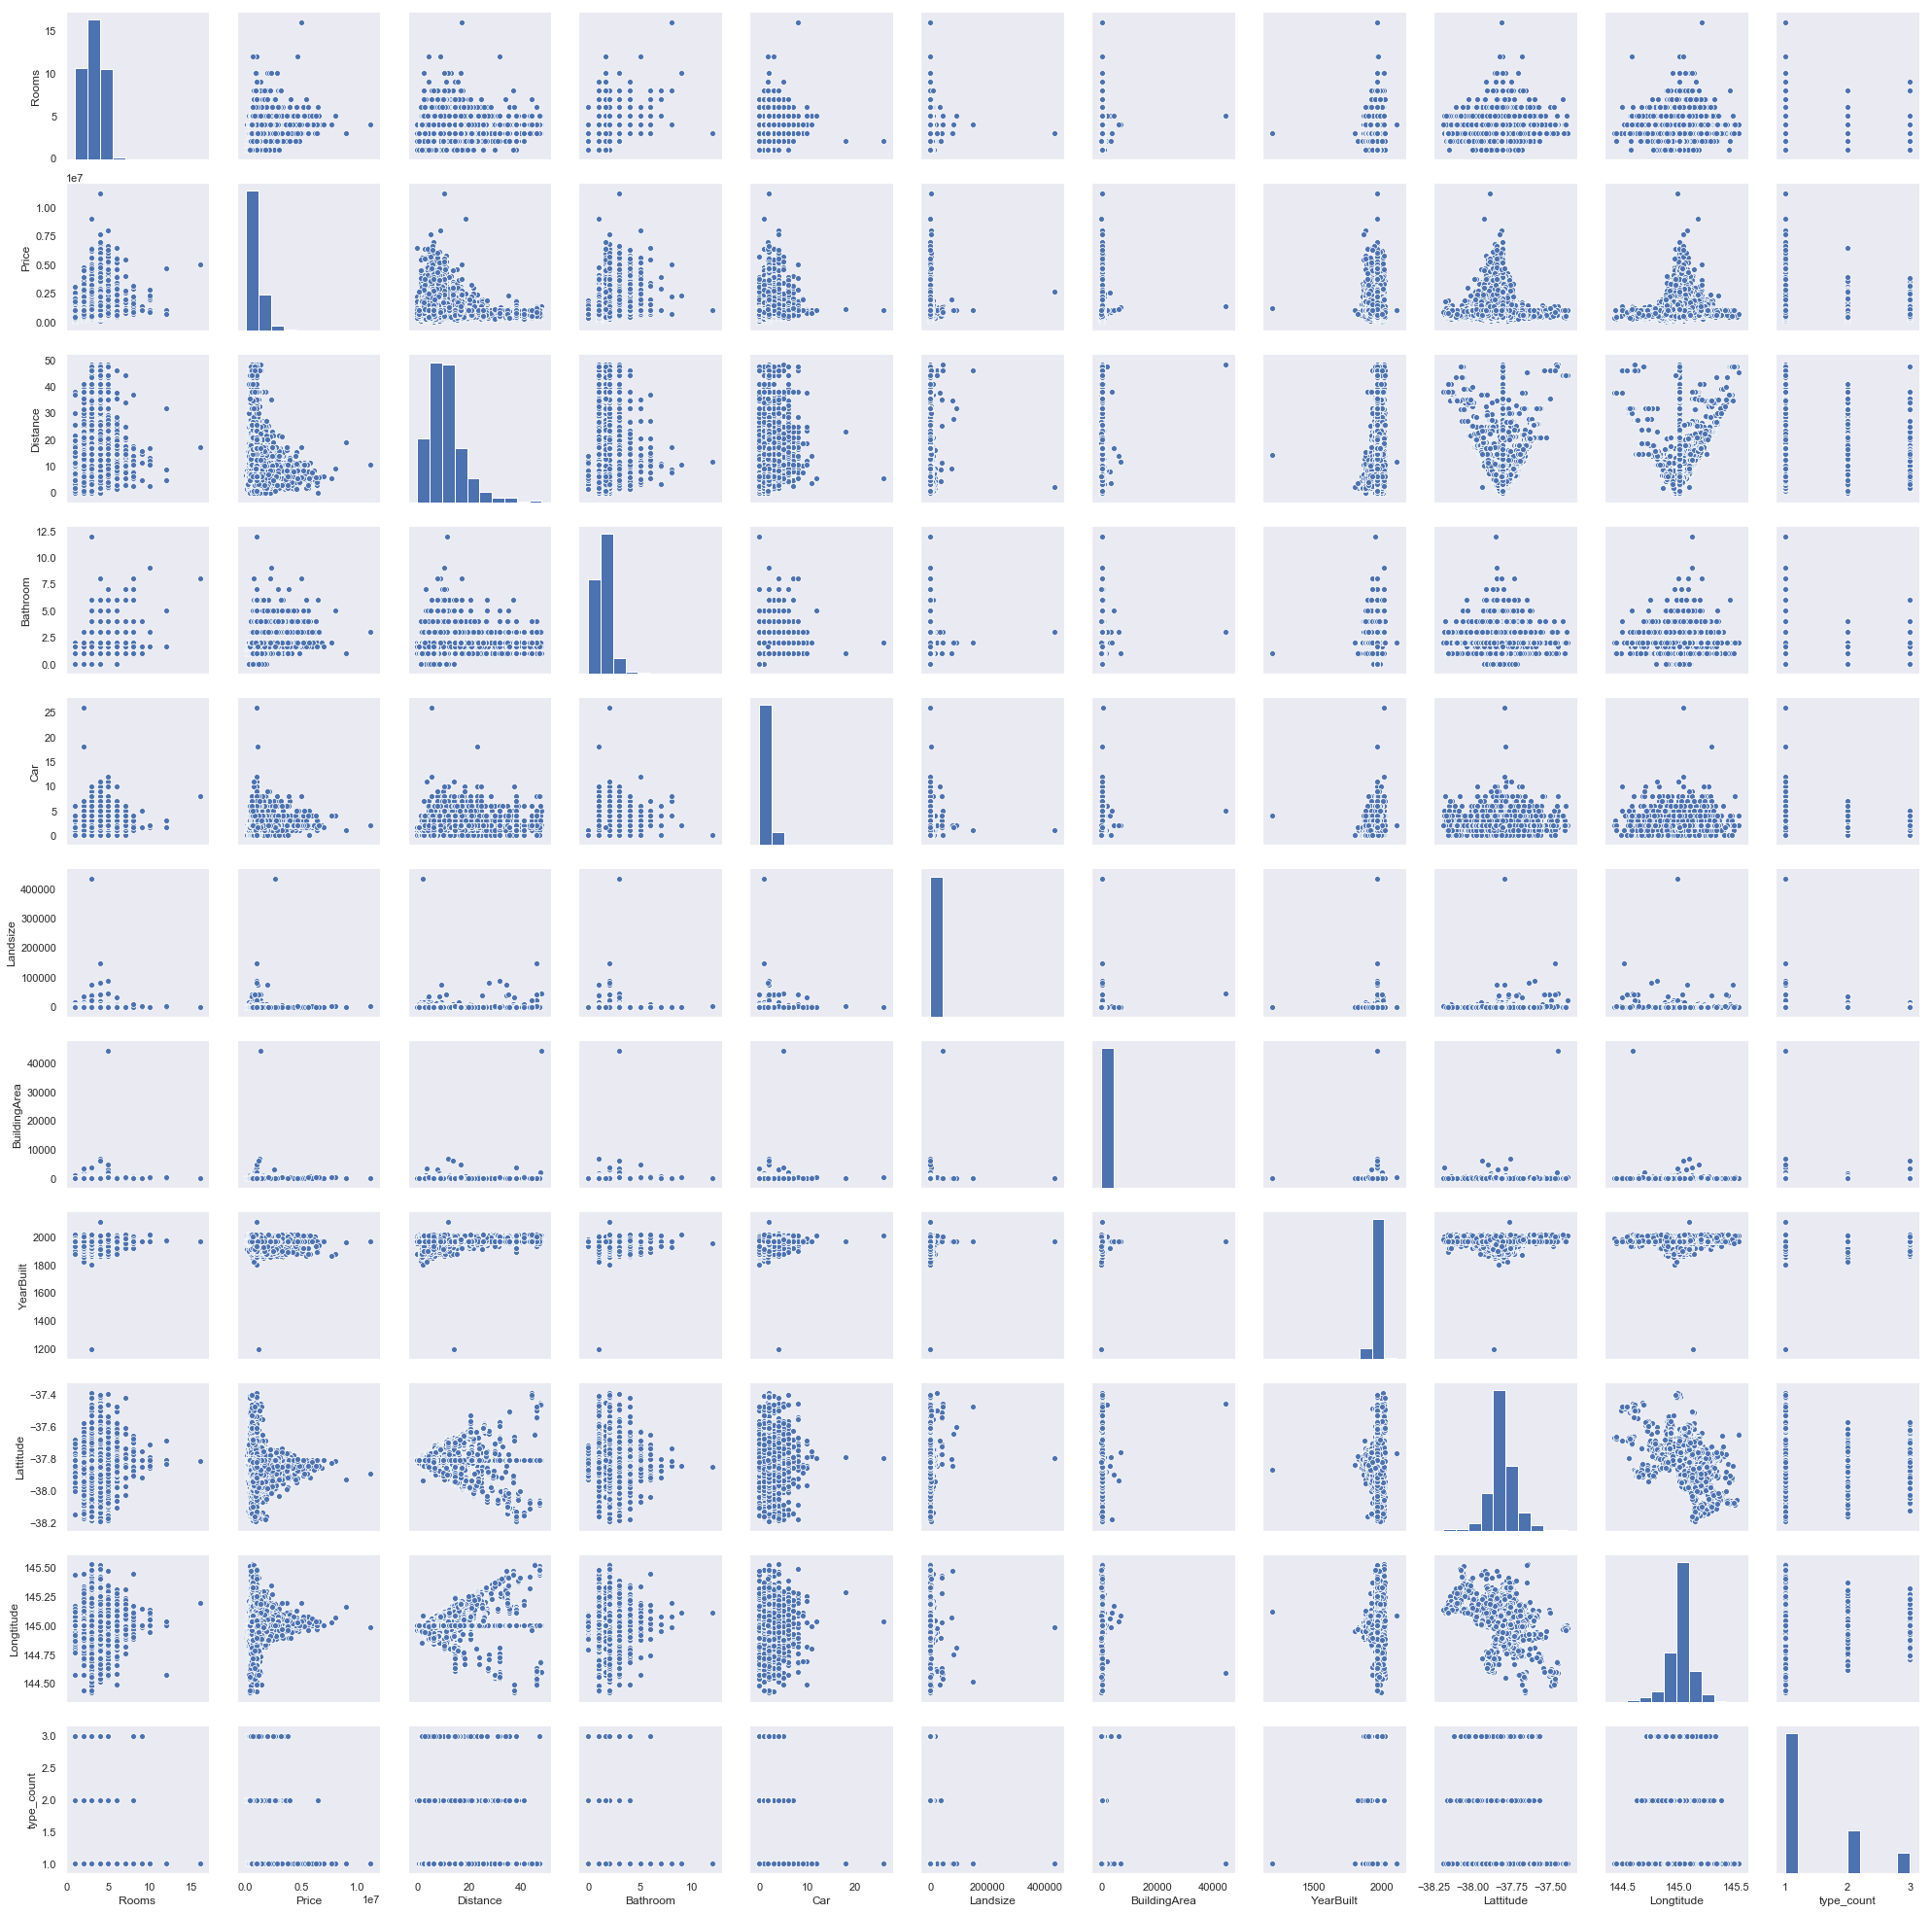

In [13]:
# Visualizing relationships among variables
sns.set(style="dark")
print(sns.pairplot(housing))

Text(0.5, 1.0, 'Pricing against cars')

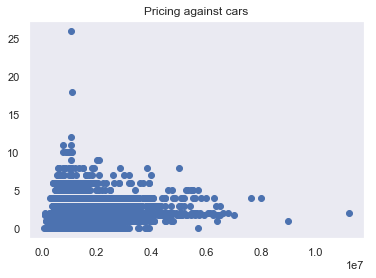

In [14]:
plt.scatter(housing.Price,housing.Car)
plt.title('Pricing against cars')

# there seems to be outling car variables

Text(0.5, 1.0, 'Pricing against distance')

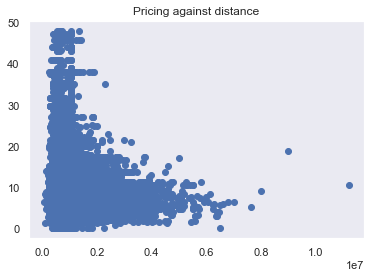

In [15]:
plt.scatter(housing.Price,housing.Distance)
plt.title('Pricing against distance')


(array([9.8110e+03, 1.5084e+04, 9.6930e+03, 2.0400e+02, 5.1000e+01,
        4.0000e+00, 6.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

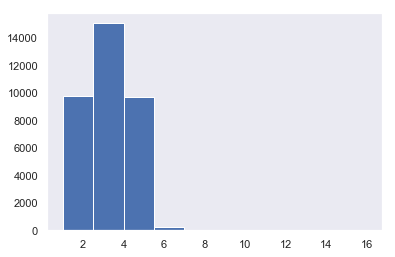

In [16]:
plt.hist(housing['Rooms'])

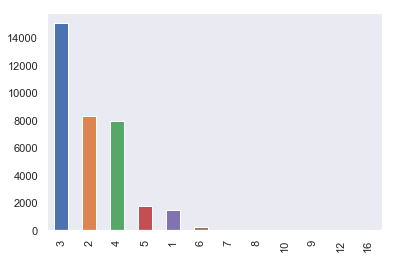

In [17]:
housing['Rooms'].value_counts().plot(kind='bar')

AxesSubplot(0.125,0.125;0.775x0.755)


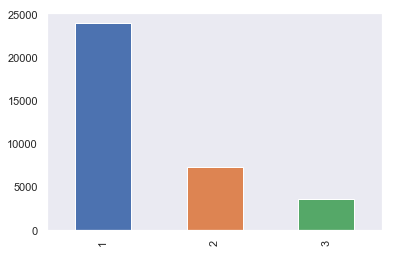

In [18]:
print(housing['type_count'].value_counts().plot(kind='bar'))


In [ ]:
plt.scatter(housing.Price,housing.type_count)


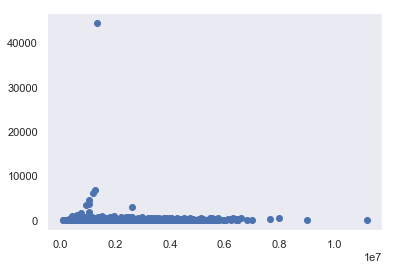

In [19]:
plt.scatter(housing.Price,housing.BuildingArea)


(array([2.6657e+04, 6.9840e+03, 9.4400e+02, 1.8600e+02, 6.0000e+01,
        2.0000e+01, 3.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   85000.,  1196500.,  2308000.,  3419500.,  4531000.,  5642500.,
         6754000.,  7865500.,  8977000., 10088500., 11200000.]),
 <a list of 10 Patch objects>)

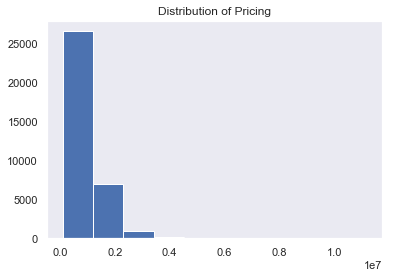

In [20]:
plt.title('Distribution of Pricing')
plt.hist(housing['Price'])


AxesSubplot(0.125,0.125;0.775x0.755)


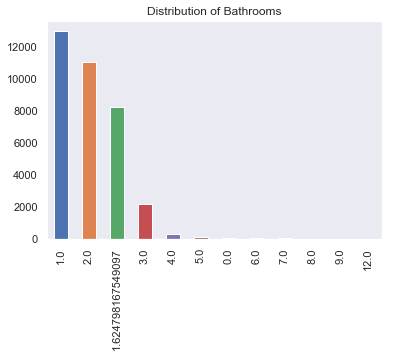

In [24]:
plt.title('Distribution of Bathrooms')

print(housing['Bathroom'].value_counts().plot(kind='bar'))

(array([1.3015e+04, 1.9290e+04, 2.1810e+03, 2.6900e+02, 7.7000e+01,
        2.0000e+01, 3.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

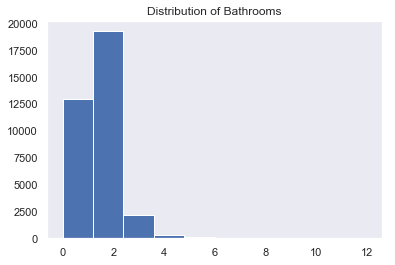

In [23]:
plt.title('Distribution of Bathrooms')
plt.hist(housing['Bathroom'])


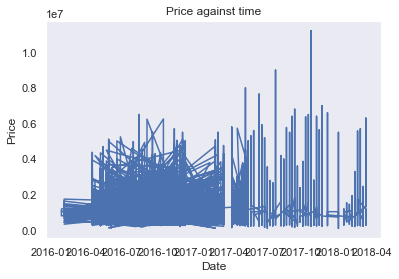

In [111]:

plt.plot(housing['Date'], housing['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price against time')
plt.show()
# Looks pretty bad

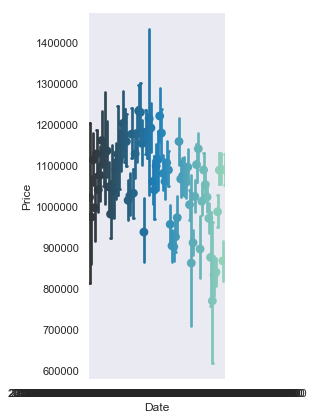

In [114]:
# visualizing price and time 
g = sns.catplot(x="Date", y="Price",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=housing)
g.despine(left=True)
plt.title('Price against time')

#Still looks pretty bad

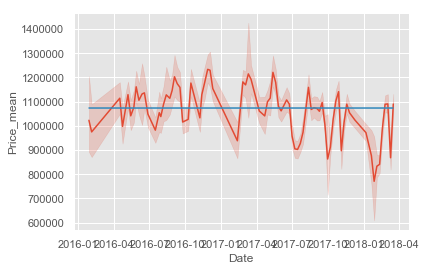

In [122]:



import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")

# Plot using Facegrid, separated by smoke
plt.style.use('ggplot')

g = sns.lineplot(x="Date", y="Price",data=housing)

housing['Price_mean'] = housing['Price'].mean()
sns.lineplot(x="Date", y="Price_mean",data=housing)

plt.title('Price against time')



From the visualization section, I need to remove some outlandish cases of cars and bathrooms. Furthermore, I can take the log of a number of values to create a normal distribution of certain variables. I cannot use timestamps in the model, so I need to see what feature can I make that emulates the pattern between price and date. 

The visualization also suggest several aspect of what makes a property valuable. Houses are the most popular type of unit, price corresponds with number of rooms, with 3 rooms being the most popular. 

### Removing Outliers and Feature Engineering

In [78]:
# Finding Extreme values
housing['Age'] = 2019 - housing['YearBuilt']

housing.Age.max()


823.0

In [79]:
housing = housing[housing.Age != 823]

In [80]:
housing[housing['Landsize']==0]


,Rooms,Price,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,type_count,Age
3,3,1.050173e+06,2016-02-04,2.5,2.0,1.0,0.0,160.2564,1965.289885,-37.81140,145.01160,2,53.710115
17,1,3.000000e+05,2016-10-08,2.5,1.0,1.0,0.0,160.2564,1965.289885,-37.80080,144.99730,2,53.710115
23,2,7.000000e+05,2016-11-12,2.5,2.0,1.0,0.0,160.2564,1965.289885,-37.81100,145.00670,2,53.710115
25,2,7.500000e+05,2016-11-12,2.5,2.0,1.0,0.0,94.0000,2009.000000,-37.80780,144.99650,2,10.000000
29,1,4.410000e+05,2016-05-14,2.5,1.0,1.0,0.0,160.2564,1965.289885,-37.80160,144.99880,2,53.710115
31,3,1.050173e+06,2016-04-16,2.5,2.0,2.0,0.0,129.0000,2010.000000,-37.80930,144.99590,2,9.000000
40,3,9.000000e+05,2017-03-18,2.5,2.0,2.0,0.0,160.2564,2010.000000,-37.80930,144.99590,3,9.000000
42,2,5.000000e+05,2016-06-18,2.5,1.0,1.0,0.0,60.0000,1970.000000,-37.80150,144.99720,2,49.000000
48,1,4.260000e+05,2016-08-22,2.5,1.0,1.0,0.0,160.2564,1965.289885,-37.80160,144.99880,2,53.710115
50,1,4.570000e+05,2016-08-22,2.5,1.0,1.0,0.0,50.0000,1965.289885,-37.80780,144.99650,2,53.710115


In [81]:
housing = housing[housing.Landsize != 0]

In [82]:
housing.Car.max()


26.0

In [83]:
housing[housing['Car']==26]
# This seems to be a very unique case, it is a house with 2 rooms and 26 car spaces, I will drop it 

,Rooms,Price,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,type_count,Age
6017,2,1.050173e+06,2016-09-24,5.6,2.0,26.0,267.0,500.0,2011.0,-37.7952,145.0322,1,8.0


In [84]:
housing = housing[housing.Car !=26]

In [85]:
housing.describe()

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,type_count,Age
count,32418.000000,3.241800e+04,32418.000000,32418.000000,32418.000000,32418.000000,32418.000000,32418.000000,32418.000000,32418.000000,32418.000000,32418.000000
mean,3.109661,1.074468e+06,11.550703,1.652711,1.772884,638.225866,163.333634,1964.657515,-37.809455,145.002856,1.372108,54.342485
std,0.940156,5.725180e+05,6.835034,0.632536,0.867357,2860.802371,260.433969,24.544917,0.080960,0.108356,0.665942,24.544917
min,1.000000,1.120000e+05,0.000000,0.000000,0.000000,1.000000,0.000000,1800.000000,-38.190430,144.423790,1.000000,-87.000000
25%,3.000000,7.210000e+05,6.800000,1.000000,1.000000,463.000000,160.256400,1965.289885,-37.844800,144.965767,1.000000,53.710115
50%,3.000000,1.050173e+06,10.500000,1.624798,1.728845,593.598993,160.256400,1965.289885,-37.810634,145.001851,1.000000,53.710115
75%,4.000000,1.190000e+06,14.300000,2.000000,2.000000,612.000000,160.256400,1965.289885,-37.768700,145.055048,2.000000,53.710115
max,16.000000,1.120000e+07,48.100000,12.000000,18.000000,433014.000000,44515.000000,2106.000000,-37.390200,145.526350,3.000000,219.000000


In [86]:
housing[housing['Car']==18]
housing = housing[housing.Car !=18]


In [87]:
housing[housing['BuildingArea']==0]


,Rooms,Price,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,type_count,Age
7211,2,8.410000e+05,2017-03-04,2.3,1.0,1.000000,215.000000,0.0,2000.000000,-37.79530,144.94370,3,19.000000
19775,5,1.950000e+06,2017-09-03,9.7,3.0,2.000000,743.000000,0.0,1949.000000,-37.80235,145.09311,1,70.000000
19840,3,8.140000e+05,2017-09-03,12.1,1.0,2.000000,542.000000,0.0,1970.000000,-37.70861,145.05691,1,49.000000
20038,3,1.050173e+06,2017-09-03,8.8,1.0,2.000000,658.000000,0.0,1920.000000,-37.75287,145.05547,1,99.000000
20223,4,5.700000e+05,2017-09-03,20.6,2.0,2.000000,504.000000,0.0,2000.000000,-37.61419,144.93448,1,19.000000
20262,3,9.000000e+05,2017-09-03,7.0,2.0,2.000000,120.000000,0.0,2000.000000,-37.76343,145.02096,3,19.000000
20576,4,1.050173e+06,2017-09-09,39.0,3.0,6.000000,593.598993,0.0,2013.000000,-38.01458,145.38619,1,6.000000
21155,2,7.350000e+05,2017-09-16,7.2,1.0,2.000000,593.598993,0.0,1960.000000,-37.88646,144.98491,2,59.000000
21510,3,1.050173e+06,2017-09-16,20.6,2.0,2.000000,647.000000,0.0,2000.000000,-37.63211,144.92587,1,19.000000
21561,5,7.200000e+05,2017-09-16,10.5,2.0,2.000000,593.598993,0.0,2010.000000,-37.79324,144.79389,1,9.000000


In [88]:
housing = housing[housing.BuildingArea !=0]


In [89]:
housing[housing['Bathroom']==0]
# Is it likely to have houses or aparments, includings ones with multiple rooms without a bathroom? I dont think so 

,Rooms,Price,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,type_count,Age
228,3,1.485000e+06,2016-08-28,6.4,0.0,0.0,597.0,160.2564,1965.289885,-37.77810,145.02840,1,53.710115
1009,2,1.010000e+06,2016-07-30,9.7,0.0,0.0,1611.0,160.2564,1965.289885,-37.80920,145.10160,1,53.710115
1549,3,7.000000e+05,2016-05-22,13.9,0.0,0.0,456.0,160.2564,1965.289885,-37.93140,145.08080,1,53.710115
2716,4,1.400000e+06,2016-04-16,7.8,0.0,0.0,693.0,160.2564,1935.000000,-37.83600,145.09140,1,84.000000
2853,3,1.050173e+06,2016-04-23,9.0,0.0,0.0,502.0,160.2564,1965.289885,-37.82140,145.08580,1,53.710115
4567,2,8.450000e+05,2016-09-10,9.2,0.0,0.0,207.0,160.2564,1965.289885,-37.86300,145.05010,1,53.710115
4611,4,1.550000e+06,2016-05-14,9.2,0.0,0.0,769.0,160.2564,1965.289885,-37.86280,145.07340,1,53.710115
6242,3,1.050173e+06,2016-05-07,7.4,0.0,0.0,476.0,160.2564,1965.289885,-37.86990,145.03700,1,53.710115
8106,4,1.004000e+06,2016-09-03,8.8,0.0,0.0,650.0,160.2564,1965.289885,-37.73460,145.02260,1,53.710115
9132,1,7.605000e+05,2016-06-04,2.1,0.0,0.0,438.0,160.2564,1965.289885,-37.83530,144.96000,2,53.710115


In [90]:
housing = housing[housing.Bathroom !=0]


In [91]:
housing[housing['Age']<0]
# An Age cannot be less than 0 not sure why this case has a neg age, will drop 

,Rooms,Price,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,type_count,Age
2453,4,1.050173e+06,2016-11-07,11.8,2.0,2.0,729.0,255.0,2106.0,-37.7637,145.0881,1,-87.0


In [92]:
housing = housing[housing.Age >=0]


#### Feature engineering


In [93]:
housing.describe()


,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,type_count,Age
count,32318.000000,3.231800e+04,32318.000000,32318.000000,32318.000000,32318.000000,32318.000000,32318.000000,32318.000000,32318.000000,32318.000000,32318.000000
mean,3.109134,1.074502e+06,11.548230,1.653803,1.773529,638.343126,163.717088,1964.633073,-37.809485,145.002811,1.372579,54.366927
std,0.940112,5.726226e+05,6.833351,0.631325,0.861355,2865.065177,260.715509,24.516581,0.080857,0.108356,0.666241,24.516581
min,1.000000,1.120000e+05,0.000000,1.000000,0.000000,1.000000,0.010000,1800.000000,-38.190430,144.423790,1.000000,0.000000
25%,3.000000,7.210000e+05,6.800000,1.000000,1.000000,463.000000,160.256400,1965.289885,-37.844768,144.965800,1.000000,53.710115
50%,3.000000,1.050173e+06,10.500000,1.624798,1.728845,593.598993,160.256400,1965.289885,-37.810634,145.001851,1.000000,53.710115
75%,4.000000,1.190000e+06,14.200000,2.000000,2.000000,611.000000,160.256400,1965.289885,-37.768830,145.054970,2.000000,53.710115
max,16.000000,1.120000e+07,48.100000,12.000000,12.000000,433014.000000,44515.000000,2019.000000,-37.390200,145.526350,3.000000,219.000000


(array([3.5870e+03, 2.0470e+03, 2.1705e+04, 1.7130e+03, 1.8980e+03,
        1.1320e+03, 2.1100e+02, 2.2000e+01, 1.0000e+00, 2.0000e+00]),
 array([  0. ,  21.9,  43.8,  65.7,  87.6, 109.5, 131.4, 153.3, 175.2,
        197.1, 219. ]),
 <a list of 10 Patch objects>)

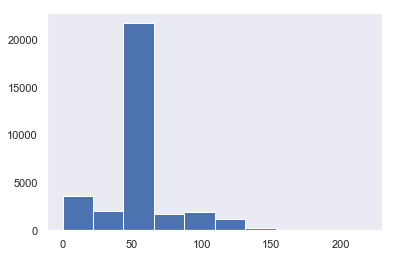

In [94]:
plt.hist(housing['Age'])

(array([   70.,   462.,  2823.,  6183., 10268.,  7722.,  3016.,   948.,
          701.,   125.]),
 array([0.        , 0.69354164, 1.38708327, 2.08062491, 2.77416654,
        3.46770818, 4.16124981, 4.85479145, 5.54833308, 6.24187472,
        6.93541635]),
 <a list of 10 Patch objects>)

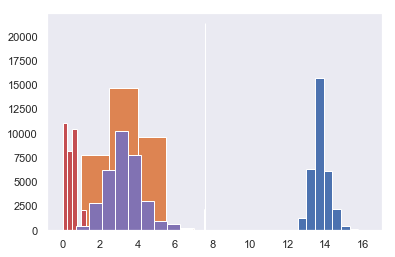

In [101]:
# Feature engineering 

housing['Price_log'] = np.log(housing['Price'])
plt.hist(housing['Price_log'])

housing['Rooms_sqrt'] = np.sqrt(housing['Rooms'])
plt.hist(housing['Rooms'])

housing['year_built_sq']= np.log(housing['YearBuilt'])
plt.hist(housing['year_built_sq'])

housing['Bathroom_log'] = np.log(housing['Bathroom'])
plt.hist(housing['Bathroom_log'])

housing['Distance_log'] = np.sqrt(housing['Distance'])
plt.hist(housing['Distance_log'])

In [ ]:
housing['Price_log'] = np.log(housing['Price'])
plt.hist(housing['Price_log'])

In [ ]:
housing['Rooms'] = np.sqrt(housing['Rooms'])
plt.hist(housing['Rooms'])

In [ ]:
housing['year_built_sq']= np.log(housing['YearBuilt'])
plt.hist(housing['year_built_sq'])


In [ ]:
housing['Bathroom_log'] = np.sqrt(housing['Bathroom'])
plt.hist(housing['Bathroom_log'])

In [ ]:
plt.hist(housing['Bathroom'])

In [ ]:
housing['Distance_log'] = np.sqrt(housing['Distance'])
plt.hist(housing['Distance_log'])

In [ ]:
plt.hist(housing['Distance'])

In [ ]:
housing.describe()


                  Rooms     Price  Distance  Bathroom       Car  Landsize  \
Rooms          1.000000  0.376335  0.230318  0.511224  0.304056  0.013694   
Price          0.376335  1.000000 -0.228075  0.302111  0.124419  0.017795   
Distance       0.230318 -0.228075  1.000000  0.085573  0.185381  0.038405   
Bathroom       0.511224  0.302111  0.085573  1.000000  0.280492  0.025616   
Car            0.304056  0.124419  0.185381  0.280492  1.000000  0.025158   
Landsize       0.013694  0.017795  0.038405  0.025616  0.025158  1.000000   
BuildingArea   0.088629  0.057764  0.042807  0.102773  0.067791  0.083440   
YearBuilt      0.019608 -0.198174  0.260915  0.146960  0.121359  0.017132   
Lattitude     -0.014233 -0.183323 -0.097825 -0.071565 -0.019402  0.019979   
Longtitude     0.085529  0.152626  0.172609  0.105325  0.038845 -0.004489   
type_count    -0.325623 -0.215138 -0.123480 -0.029341 -0.111750 -0.008053   
Age           -0.019608  0.198174 -0.260915 -0.146960 -0.121359 -0.017132   

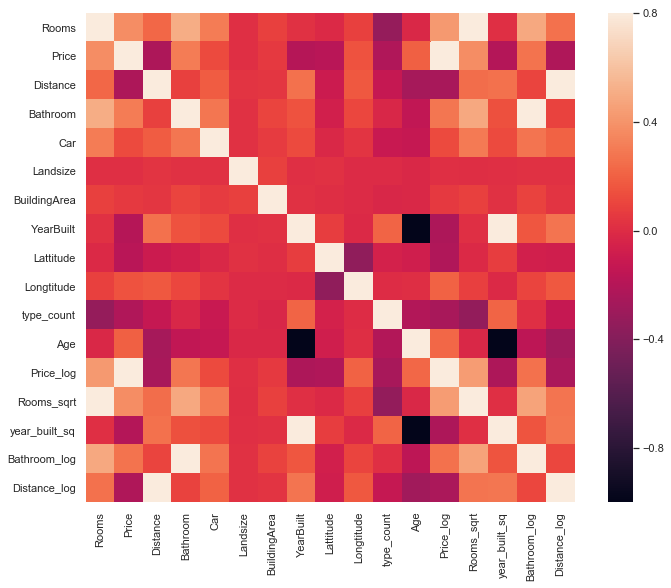

In [103]:
# Make the correlation matrix.
corrmat = housing.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

### Feature Selection 

In [156]:
#housing = housing.drop(['Date'],1)
#housing = housing.drop(['Price_log'],1)
housing['Price_log'] = np.log(housing['Price'])

### Gridsearch CV

In [145]:
# Try to figure out what are the most important features first. 
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest, f_regression 
import numpy as np

# selectKbest 
skb_y = housing['Price']
skb_X = housing.drop('Price',1)


# Perform feature selection
selector = SelectKBest(score_func=feature_selection.f_regression)
selector.fit(skb_X,skb_y)

X_new = selector.transform(skb_X)
X_new.shape
print(selector.get_support(indices=True))

# Most 10  useful cols 
X_new = selector.transform(skb_X)
print(X_new.shape)
# Col names 
skb_X.columns[selector.get_support(indices=True)]




[ 0  1  2  6  9 10 11 12 13 14]
(32318, 10)


Index(['Rooms', 'Distance', 'Bathroom', 'YearBuilt', 'type_count', 'Age',
       'Rooms_sqrt', 'year_built_sq', 'Bathroom_log', 'Distance_log'],
      dtype='object')

In [146]:
#Using Top 10 features 
features = housing[['Rooms', 'Distance', 'Bathroom', 'YearBuilt', 'type_count', 'Age',
       'Rooms_sqrt', 'year_built_sq', 'Bathroom_log', 'Distance_log']]

### PCA

In [172]:
# PCA for 4 components 
from sklearn.decomposition import PCA
X = housing.drop('Price',1)

# Use PCA to create new columns 
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(X)
pca_X = pd.DataFrame(data = principalComponents, 
                     columns = ['principal component 1', 'principal component 2', 
                                'principal component 3', 'principal component 4', 
                                'principal component 5', 'principal component 6',
                                'principal component 7','principal component 8'
                               'principal component 9','principal component 10'])



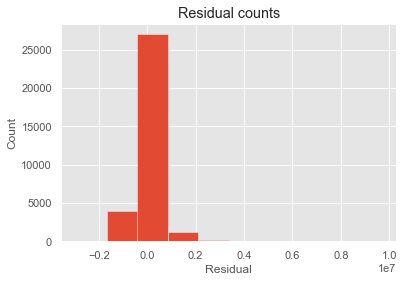

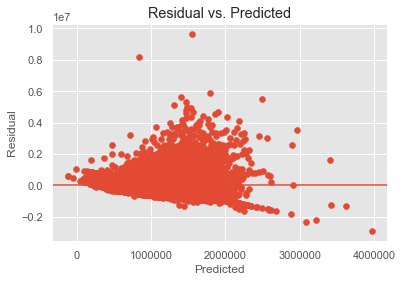

In [147]:
from sklearn import linear_model

# Fitting the model 
regr = linear_model.LinearRegression()

Y = housing['Price'].values.reshape(-1, 1)
X = features
regr.fit(X, Y)

predicted = regr.predict(X).ravel()
actual = housing['Price']


# Calculating the residual 
residual = actual - predicted

# checking residuals, somewhat normally distributed, slightly right skewed 
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

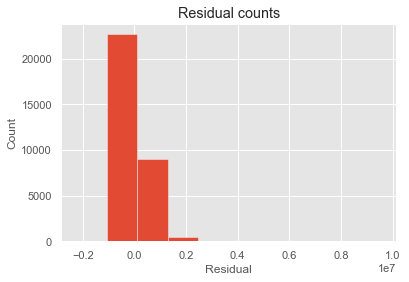

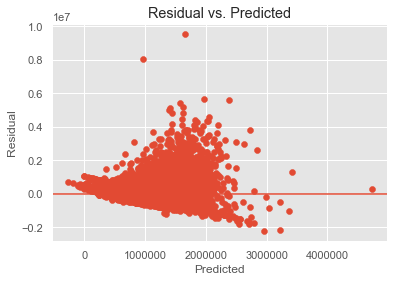

In [159]:
from sklearn import linear_model

# Fitting the model 
regr = linear_model.LinearRegression()

Y = housing['Price'].values.reshape(-1, 1)
X = pca_X
regr.fit(X, Y)

predicted = regr.predict(X).ravel()
actual = housing['Price']


# Calculating the residual 
residual = actual - predicted

# checking residuals, much more  right skewed 
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

## Model 1: Linear Regression and Ridge Regression

In [148]:
# Using Select k best
import math
from sklearn.metrics import mean_squared_error
# Fitting the model 
regr = linear_model.LinearRegression()
Y = housing['Price'].values.reshape(-1, 1)
X = features
regr.fit(X, Y)

# Cross validation with 10% holdout group 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=10)

print('With 10% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(X, Y).score(X, Y)))

# Cross validating using 6 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(regr, X, Y, cv=6))


#RSME 
meanSquaredError = mean_squared_error(Y, predicted)
rootMeanSquaredError = math.sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)



# Model results 
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

With 10% Holdout: 0.31400491132160235
Testing on Sample: 0.3009557541543598
[0.25884843 0.27646209 0.29934605 0.30561882 0.28623704 0.32457735]
RMSE: 478755.83276040637

Coefficients: 
 [[-1.49487105e+05 -5.21327021e+03  3.33664121e+05 -5.84656688e+14
  -8.68045321e+04 -5.84656688e+14  1.22267412e+06 -5.47205447e+06
  -2.95829470e+05 -1.48919831e+05]]

Intercept: 
 [1.18042185e+18]

R-squared:
0.3009557541543598


### Linear regression PCA

In [169]:
# Using PCA 
import math
from sklearn.metrics import mean_squared_error
# Fitting the model 
regr = linear_model.LinearRegression()
Y = housing['Price'].values.reshape(-1, 1)
X = pca_X
regr.fit(X, Y)

# Cross validation with 10% holdout group 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=10)

print('With 10% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(X, Y).score(X, Y)))

# Cross validating using 6 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(regr, X, Y, cv=6))


#RSME 
meanSquaredError = mean_squared_error(Y, predicted)
rootMeanSquaredError = math.sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)



# Model results 
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

With 10% Holdout: 0.23301019119969013
Testing on Sample: 0.3498514644986648
[0.32998389 0.33068741 0.34767256 0.24747177 0.32953848 0.36527358]
RMSE: 462720.3296486311

Coefficients: 
 [[ 3.56417756e+00  1.24280774e+02  3.32605678e+03  1.56077148e+04
  -2.50067949e+05 -9.77874465e+04 -2.85927284e+04  6.05959744e+04]]

Intercept: 
 [1074502.17613787]

R-squared:
0.3498514644986648


While the PCA preformed better than the select k best method, both models overall prefomed poorly with less than 40% accuracy, furthermore, both have high RMSE. 

In [151]:
# Ridge Regression Gridsearch cv 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
Ridge = linear_model.Ridge()
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

fit_interceptOptions = ([True, False])
solverOptions = (['svd', 'cholesky', 'sparse_cg', 'sag'])

Y = housing['Price'].values.reshape(-1, 1)
X = features
# Create regularization penalty space

model = linear_model.Ridge(normalize=True) #We have chosen to just normalize the data by default, you could GridsearchCV this is you wanted
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas, fit_intercept=fit_interceptOptions, solver=solverOptions))

# Use GS-CV to see which alpha level is best.

# fit to data
grid.fit(X, Y)



print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_estimator_.fit_intercept)
print(grid.best_estimator_.solver)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00]), 'fit_intercept': [True, False], 'solver': ['svd', 'cholesky', 'sparse_cg', 'sag']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.29443906311409873
0.0
True
cholesky


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=1.35532e-17): result may not be accurate.
  overwrite_a=True).T


In [152]:
ridger = linear_model.Ridge(normalize=True, alpha=0.1, fit_intercept=True, solver='cholesky')

import math
from sklearn.metrics import mean_squared_error
# Fitting the model 
ridger = linear_model.Ridge(normalize=True, alpha=0.1, fit_intercept=True, solver='sag')

Y = housing['Price'].values.reshape(-1, 1)
X = features
ridger.fit(X, Y)

# Cross validation with 10% holdout group 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=10)

print('With 10% Holdout: ' + str(ridger.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(ridger.fit(X, Y).score(X, Y)))

# Cross validating using 6 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(ridger, X, Y, cv=6))


#RSME 
meanSquaredError = mean_squared_error(Y, predicted)
rootMeanSquaredError = math.sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)



# Model results 
print('\nCoefficients: \n', ridger.coef_)
print('\nIntercept: \n', ridger.intercept_)
print('\nR-squared:')
print(ridger.score(X, Y))

With 10% Holdout: 0.3119720051633794
Testing on Sample: 0.2955908328733057
[0.25887587 0.27537148 0.29786093 0.29881606 0.2773422  0.31496289]
RMSE: 478755.83276040637

Coefficients: 
 [[ 8.20197672e+04 -1.12000699e+04  1.34580512e+05 -9.58158338e+02
  -9.01506269e+04  9.58158338e+02  3.85450993e+05 -1.94438800e+06
   3.66943089e+04 -9.21915170e+04]]

Intercept: 
 [17037311.34911057]

R-squared:
0.2955908328733057


In [161]:
# Ridge Regression Gridsearch cv 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
Ridge = linear_model.Ridge()
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

fit_interceptOptions = ([True, False])
solverOptions = (['svd', 'cholesky', 'sparse_cg', 'sag'])

Y = housing['Price'].values.reshape(-1, 1)
X = pca_X
# Create regularization penalty space

model = linear_model.Ridge(normalize=True) #We have chosen to just normalize the data by default, you could GridsearchCV this is you wanted
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas, fit_intercept=fit_interceptOptions, solver=solverOptions))

# Use GS-CV to see which alpha level is best.

# fit to data
grid.fit(X, Y)



print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_estimator_.fit_intercept)
print(grid.best_estimator_.solver)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00]), 'fit_intercept': [True, False], 'solver': ['svd', 'cholesky', 'sparse_cg', 'sag']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.3195396825256574
0.0
True
sag


In [162]:
ridger = linear_model.Ridge(normalize=True, alpha=0.1, fit_intercept=True, solver='cholesky')

import math
from sklearn.metrics import mean_squared_error
# Fitting the model 
ridger = linear_model.Ridge(normalize=True, alpha=0.0, fit_intercept=True, solver='sag')

Y = housing['Price'].values.reshape(-1, 1)
X = pca_X
ridger.fit(X, Y)

# Cross validation with 10% holdout group 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=10)

print('With 10% Holdout: ' + str(ridger.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(ridger.fit(X, Y).score(X, Y)))

# Cross validating using 6 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(ridger, X, Y, cv=6))


#RSME 
meanSquaredError = mean_squared_error(Y, predicted)
rootMeanSquaredError = math.sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)



# Model results 
print('\nCoefficients: \n', ridger.coef_)
print('\nIntercept: \n', ridger.intercept_)
print('\nR-squared:')
print(ridger.score(X, Y))

With 10% Holdout: 0.20112354076145922
Testing on Sample: 0.3469935065373997
[0.3267699  0.3244499  0.34434066 0.22470773 0.32785306 0.36576976]
RMSE: 462720.3296486311

Coefficients: 
 [[ 3.56466646e+00  1.24607814e+02  3.34070604e+03  1.56745961e+04
  -2.51044635e+05 -9.83172718e+04 -2.86270883e+04]]

Intercept: 
 [1074502.17613787]

R-squared:
0.3469935065373997


In the select k best ridge model, the model peformed worse on the test sample when compared with the trainning sample, which may suggest overfitting. Both using PCA, both linear regression and ridge regression yielded similar results. With a similar RMSE to the prior models, the ridge models  do not offer imporovement and overall inaccurate predicition. 

## Model 2: KNN regression 

In [153]:
# Model 2: KNN gridsearch
from sklearn import neighbors

from sklearn.model_selection import GridSearchCV 

# Initialize the model
knn = neighbors.KNeighborsRegressor()

# Set parameters for KNN
# List of values to try 
knn_params = [{'n_neighbors': [2,3,5,7,10,15,25]}]


# Search for the best paramters. 
knn_grid = GridSearchCV(knn, knn_params, cv=7, verbose=1, n_jobs=-1)

# Fit the grid and obtain results
knn_grid.fit(X, Y)

# Return best parameters and best score
print(knn_grid.best_params_)
print(knn_grid.best_score_)

Fitting 7 folds for each of 7 candidates, totalling 49 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:  1.0min finished


{'n_neighbors': 25}
0.32190387239931106


In [154]:
# Nearest neighbors model 
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=25)

Y = housing['Price'].values.reshape(-1, 1)
X = features

knn.fit(X,Y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(knn.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(knn.fit(X, Y).score(X, Y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn, X, Y, cv=10))

#RSME 
meanSquaredError = mean_squared_error(Y, predicted)
rootMeanSquaredError = math.sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)



# Model results 

print('\nR-squared:')
print(knn.score(X, Y))


With 20% Holdout: 0.32216307700637103
Testing on Sample: 0.39765986639529516
[0.19732478 0.30394504 0.23679601 0.29306042 0.3629872  0.36451042
 0.40633893 0.31114944 0.35768072 0.40620179]
RMSE: 478755.83276040637

R-squared:
0.39765986639529516


This model preformed better than the simple ridge regression model 

In [163]:
# Model 2: KNN gridsearch
from sklearn import neighbors

from sklearn.model_selection import GridSearchCV 

# Initialize the model
knn = neighbors.KNeighborsRegressor()

Y = housing['Price'].values.reshape(-1, 1)
X = pca_X

# Set parameters for KNN
# List of values to try 
knn_params = [{'n_neighbors': [2,3,5,7,10,15,25]}]


# Search for the best paramters. 
knn_grid = GridSearchCV(knn, knn_params, cv=7, verbose=1, n_jobs=-1)

# Fit the grid and obtain results
knn_grid.fit(X, Y)

# Return best parameters and best score
print(knn_grid.best_params_)
print(knn_grid.best_score_)

Fitting 7 folds for each of 7 candidates, totalling 49 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.8s


{'n_neighbors': 10}
0.33318546834862606


[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:   32.0s finished


In [173]:
# Nearest neighbors model 
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=10)
Y = housing['Price'].values.reshape(-1, 1)
X = pca_X

knn.fit(X,Y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.4, random_state=200)
print('With 20% Holdout: ' + str(knn.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(knn.fit(X, Y).score(X, Y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn, X, Y, cv=10))

#RSME 
meanSquaredError = mean_squared_error(Y, predicted)
rootMeanSquaredError = math.sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)



# Model results 

print('\nR-squared:')
print(knn.score(X, Y))


With 20% Holdout: 0.4146174082019898
Testing on Sample: 0.5448713543130257
[0.40234078 0.43696139 0.39169524 0.38336399 0.41092222 0.38514458
 0.44852482 0.45389743 0.47408881 0.37327565]
RMSE: 462720.3296486311

R-squared:
0.5448713543130257


The PCA models performed siginificantly better when using the KNN model. This was even evident in the gridsearch results. The PCA model relied on fewer neighbors but yielded signigicantly more accurate results than the model that relied on select k best. With a lower RMSE and higher R-squared value than all prior models, the KNN regression using PCA has been the best. However, the high RMSE may suggest some form of overfitting. 


## Model 3: Random Forest 

In [155]:
# Model 3: Random Forest gridsearchcv  
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

Y = housing['Price'].values.reshape(-1, 1)
X = features

param_grid = { 
    'n_estimators': [15, 200, 500, 750],
    'max_features': [1,2,4,6, 7,8,9,10],
    'max_depth': [4,5,6,7,8]
}


grid = GridSearchCV(rfr, param_grid, cv=5, verbose=3, n_jobs=-1)

grid.fit(X, Y)

# Show the best parameter and best score for unfiltered
print(grid.best_params_)
print( grid.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 23.6min finished
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 8, 'max_features': 6, 'n_estimators': 1000}
0.35219758711844296


In [157]:
# Random forest model 
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000, max_features=9, max_depth=8)

Y = housing['Price'].values.reshape(-1, 1)
X = features

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(rfr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(rfr.fit(X, Y).score(X,Y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(rfr, X, Y, cv=10))

#RSME 
meanSquaredError = mean_squared_error(Y, predicted)
rootMeanSquaredError = math.sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)


# Model results 

print('\nR-squared:')
print(rfr.score(X, Y))



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


With 20% Holdout: 0.3812899630579508


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Testing on Sample: 0.42923532772895745


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Pytho

[0.20873642 0.33971166 0.27592797 0.34987537 0.38322011 0.36857087
 0.44958523 0.35582704 0.36877038 0.42289814]
RMSE: 478755.83276040637

R-squared:
0.42923532772895745


In [174]:
# Model 3: Random Forest gridsearchcv  
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

Y = housing['Price'].values.reshape(-1, 1)
X = pca_X

param_grid = { 
    'n_estimators': [15, 200, 500, 750],
    'max_features': [1,2,4,6, 7,8,9],
    'max_depth': [4,5,6,7,8]
}


grid = GridSearchCV(rfr, param_grid, cv=5, verbose=3, n_jobs=-1)

grid.fit(X, Y)

# Show the best parameter and best score for unfiltered
print(grid.best_params_)
print( grid.best_score_)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 68.7min
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed: 169.4min finished
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 8, 'max_features': 6, 'n_estimators': 200}
0.9505115726267309


In [175]:
# Random forest model 
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=200, max_features=6, max_depth=8)

Y = housing['Price'].values.reshape(-1, 1)
X = pca_X

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(rfr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(rfr.fit(X, Y).score(X,Y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(rfr, X, Y, cv=10))

#RSME 
meanSquaredError = mean_squared_error(Y, predicted)
rootMeanSquaredError = math.sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)


# Model results 

print('\nR-squared:')
print(rfr.score(X, Y))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


With 20% Holdout: 0.9555631935074345


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Testing on Sample: 0.972397201255816


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Pytho

[0.96219742 0.97068798 0.95544001 0.95039803 0.95299359 0.92482165
 0.95271129 0.92547863 0.95997121 0.95944702]
RMSE: 462720.3296486311

R-squared:
0.972397201255816


This model has done suprisingly well, and far superior in comparison to the others. For both PCA and select k best, the random forest model significantly raised the accuracy while maintaing a similar or slightly lower RMSE. When comparing the use of select k best and PCA, the PCA model performed twice as well. Across the 10 cross validations, the results were similar and had less variation across them than prior models. The only problem may be the RMSE, while it is lower than other models, it is still high which may sugguest that the model is close to overfitting, like the others. 

## PLS regression 

In [182]:
from sklearn.cross_decomposition import PLSRegression

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=6)

Y = housing['Price'].values.reshape(-1, 1)

X = housing.drop('Price',1)


# Reduce X to R(X) and regress on y.
pls1.fit(X, Y)



from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=200)
print('With 20% Holdout: ' + str(pls1.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(pls1.fit(X, Y).score(X,Y)))





# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, Y))


# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(pls1, X, Y, cv=10))

#RSME 
meanSquaredError = mean_squared_error(Y, Y_PLS_pred)
rootMeanSquaredError = math.sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)


# Model results 

print('\nR-squared:')
print(pls1.score(X, Y))

With 20% Holdout: 0.8367381747994398
Testing on Sample: 0.8516345211424027
R-squared PLSR: 0.8516345211424027
[0.87148399 0.8625938  0.84347076 0.84398759 0.84819606 0.83106587
 0.8456811  0.81478203 0.8427763  0.86086141]
RMSE: 220560.723045849

R-squared:
0.8516345211424027


Concered about overfitting, I decided to use pls without using PCA or select k best methods. Doing so yielded the second best performing model, but also the lowest RMSE of all the models. Like in the Random Forest model, the model had little variation across the 10 cross validation and showed similar  results on the testing sample. This seems to be the least overfit model but maintains accurate results. 

# Conclusion

In conclusion, the number of rooms, distance , number of bathrooms, and the age are the most indicitive traits concering a properties price. Of all of the models that I had tested to achieve my goal of accuratly prediciting the price of a property, the PLS regression performed the best. While my Random forest model yielded a higher rate of accuracy, the RMSE score may suggest a degree of overfitting. The RMSE of the Random Forest model is not that different from the worse performing models, which raised concern with me. While still maintaining over 80% accuracy, the RMSE is nearly half that of the Random Forest, which is ultimatly why I concluded it as the best model for this task. 